# MECH 510: Final Projects
Dec. 2, 2019

Athena Liu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



## 3.1 Validation: Stability 

In [14]:
 def convergence(f_name):
    f = pd.read_csv("./outputs/" + f_name + ".csv")
    plt.plot(f["Iter"], f["dP"])
    plt.plot(f["Iter"], f["du"])
    plt.plot(f["Iter"], f["dv"])

    plt.yscale('log')
    plt.grid(True)
    plt.xlabel("Iterations")
    plt.ylabel("$L_2$ Norm of Changes")
    plt.legend(["$||dP||_2$", "$||du||_2$", "$||dv||_2$"])
    plt.show()

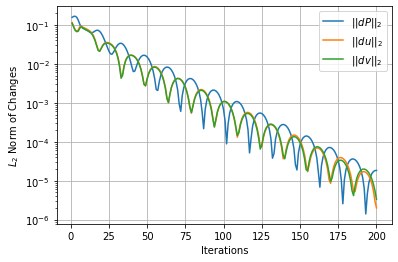

In [15]:
convergence("log-3_1_validation")

## 2 Things to watch out for (Optimization)
Use Re = 100, U_top = 1, 20 by 20 mesh, tolerance $10^{-6}$, dt = 0.1, h = 1.

In [167]:
 def compare_convergence(parameter, values, component):
    for value in values:
        s_value = str(value).replace(".", "_")
        f = pd.read_csv("./outputs/log-" + parameter + "-" + s_value + ".csv")
        lb = parameter + "=" +str(value)
        plt.plot(f["Iter"], f["d"+component], label=lb)
    plt.yscale('log')
    plt.grid(True)
    plt.xlabel("Iterations")
    plt.ylabel("$L_2$ Norm of $||d"+component+"||_2$")
    plt.legend()
    plt.show()

### 2.2 Choice of beta 
beta = 0.75 seems to be a good choice.

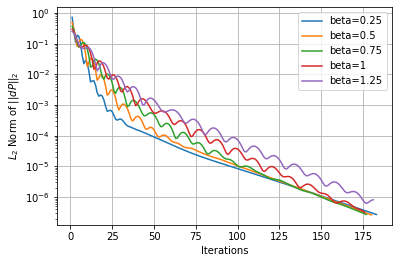

In [168]:
values=[0.25, 0.5, 0.75, 1, 1.25]
compare_convergence("beta", values, 'P')

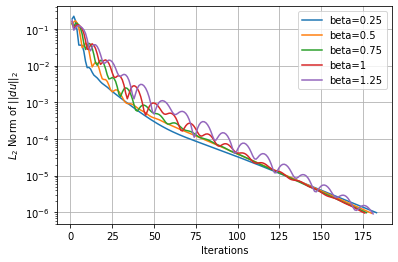

In [169]:
compare_convergence("beta", values, 'u')

### 2.3 Overrelaxation 
U = U + omega * dU

omega=1.25 seems the optimal

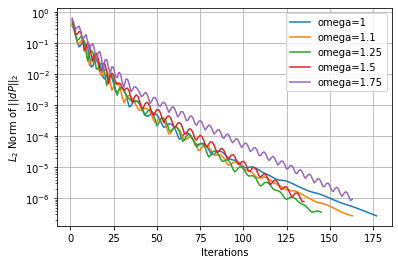

In [170]:
values=[1, 1.1, 1.25, 1.5, 1.75]
compare_convergence("omega", values, "P")

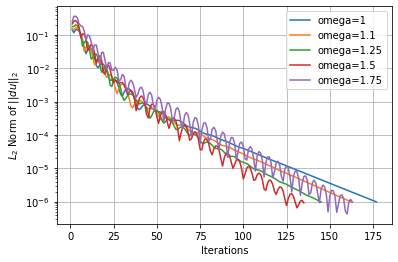

In [171]:
values=[1, 1.1, 1.25, 1.5, 1.75]
compare_convergence("omega", values, "P")

## 3.2 Basic solutions
### 3.2.1 Solution

Convergence history of $U_{top}=1$ with $\Delta t=0.1$ and tolerance$=10^{-6}$.

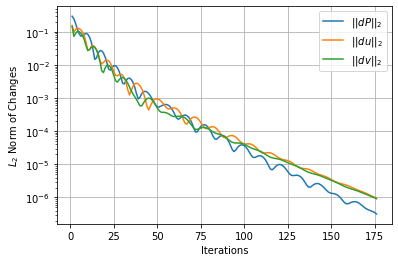

In [17]:
convergence("log-3_2")

In [3]:
def read_field(f_name):
    f = pd.read_csv("./outputs/" + f_name + ".csv", header=None)
    f = np.array(f)
    return f.T

In [ ]:
Lx = 1
Ly = 1
Factor = 20
Ni = Lx*Factor
Nj = Ly*Factor
dx = Lx/Ni
dy = Ly/Nj

In [106]:
def contour_field(file_name, field_name):
    P = read_field(file_name)
#     P = P[1:-1, 1:-1]

#     x = np.arange(dx/2, Lx, dx)
#     y = np.arange(dy/2, Ly, dy)
    
    x = np.arange(-dx/2, Lx+dx, dx)
    y = np.arange(-dy/2, Ly+dy, dy)
    X, Y = np.meshgrid(x, y)

    plt.figure(figsize=(10, 8))
    # plt.pcolor(X, Y, P)
    plt.contourf(X, Y, P, 15)
    plt.colorbar()
    plt.axis([0, 1, 0, 1])
    plt.xlabel('x')
    plt.ylabel('y')
    ttl = str(Ni) + " by " + str(Nj) + " mesh, " + field_name + " contour"
    plt.title(ttl)
    plt.show()

Surface plot of pressure.

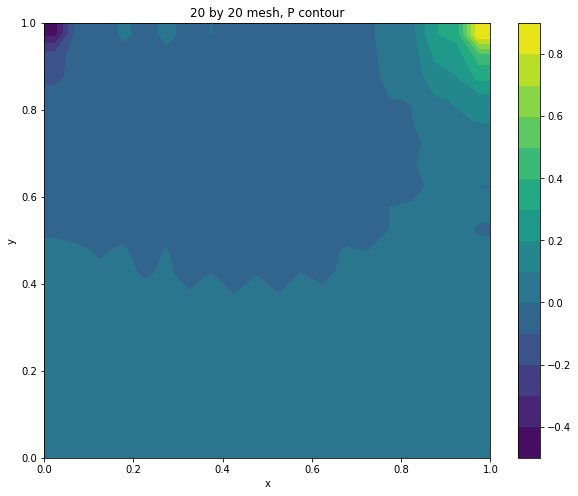

In [107]:
contour_field("3_2-20by20-P", "P")

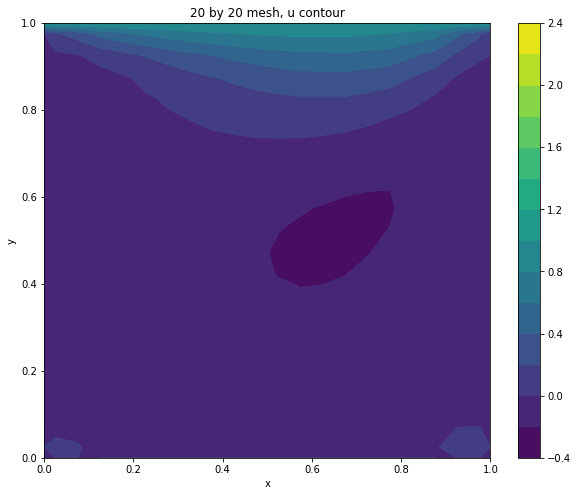

In [108]:
contour_field("3_2-20by20-u", "u")

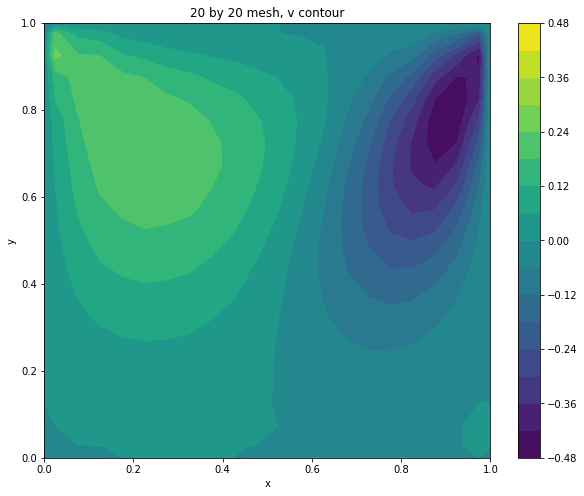

In [109]:
contour_field("3_2-20by20-v", "v")

Plot of $u$ along $x=1/2$.

In [110]:
u = read_field("3_2-20by20-u")

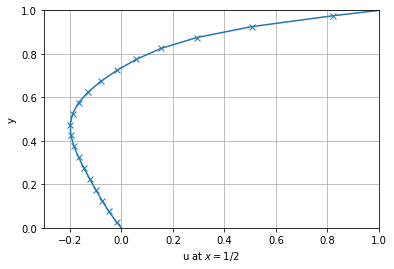

In [111]:
u_mid = (u[:,10] + u[:, 11])/2  # interpolate to get u at mid line
y = np.arange(-dy/2, Ly+dy, dy)
# y = np.arange(dy/2, Ly, dy)
plt.plot(u_mid,y, 'x-')
plt.xlabel('u at $x=1/2$')
plt.ylabel('y')
plt.axis([-0.3, 1.0, 0, 1])
plt.grid(True)
plt.show()

### 3.2.2 Sanity Check
$U_{top} = -1$

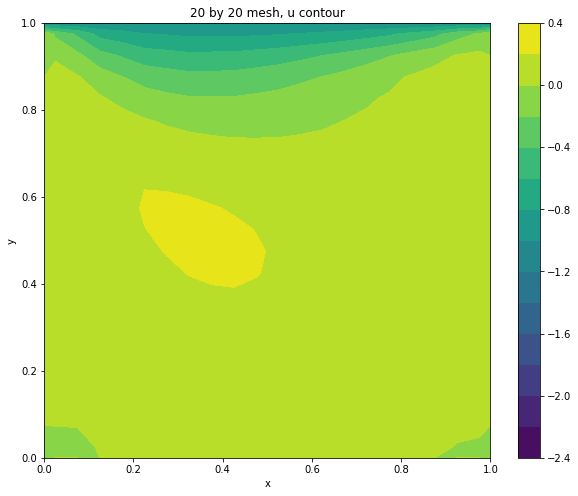

In [112]:
contour_field("3_2_2-20by20-u", "u")

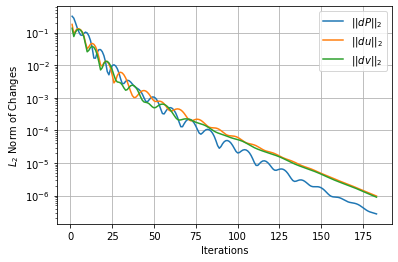

In [72]:
convergence("log-3_2_2")

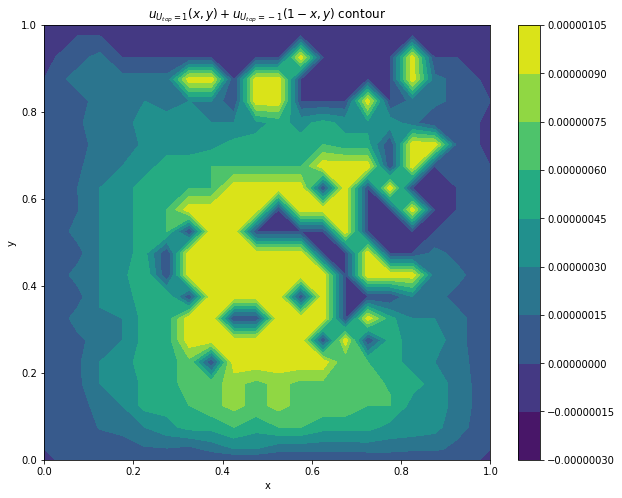

In [117]:
u1 = read_field("3_2-20by20-u")
u2 = read_field("3_2_2-20by20-u")
u = np.flip(u2,1)+u1

x = np.arange(-dx/2, Lx+dx, dx)
y = np.arange(-dy/2, Ly+dy, dy)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(10, 8))
# plt.pcolor(X, Y, P)
plt.contourf(X, Y, u, 10)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0, 1, 0, 1])
ttl = "$u_{U_{top}=1}(x,y) + u_{U_{top}=-1}(1-x,y)$ contour"
plt.title(ttl)
plt.show()

The error is of size $10^{-6}$, which is the same as the tolerance that I have set for these set of computations. 

### 3.2.3 Grid Convergence

In [259]:
jmin=np.argmin(u_mid)
xs = np.arange((jmin-3/2)*dy, (jmin+1)*dy, dy)
coeffs = np.polyfit(xs,u_mid[imax-1:imax+2] , 2)
p = np.poly1d(coeffs)
print(u_mid[jmin])
p(-coeffs[1]/2/coeffs[0])

-0.213792


-0.21379624002347541

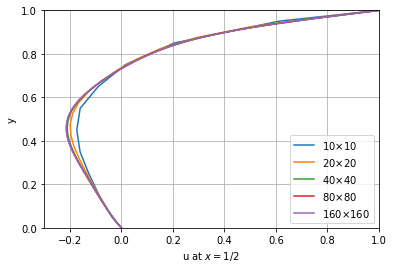

In [263]:
Ns = [10, 20, 40, 80, 160]
Ly = 1
umin = []
umin_interp = []
for n in Ns:
    file_name="u_midline-"+str(n)+"by" + str(n)
    u_mid = pd.read_csv("./outputs/" + file_name + ".csv", header=None)
    u_mid = np.array(u_mid[0])
    dy = 1/n
    jmin=np.argmin(u_mid)
    xs = np.arange((jmin-3/2)*dy, (jmin+1)*dy, dy)
    coeffs = np.polyfit(xs,u_mid[jmin-1:jmin+2] , 2)
    p = np.poly1d(coeffs)
    umin_interp.append(p(-coeffs[1]/2/coeffs[0]))    
    umin.append(np.min(u_mid))
    
    y = np.arange(-dy/2, Ly+dy, dy)
    plt.plot(u_mid,y, label=str(n)+r"$\times$"+str(n))
plt.xlabel('u at $x=1/2$')
plt.ylabel('y')
plt.legend()
plt.axis([-0.3, 1.0, 0, 1])
# plt.axis([-0.3, -0.10, 0.4, 0.6])
plt.grid(True)
plt.show()

In [264]:
umin

[-0.172967, -0.198794, -0.20995, -0.21302800000000002, -0.213792]

In [265]:
umin_interp

[-0.17296958722187883,
 -0.19922964086433204,
 -0.209994144051447,
 -0.21303685387768034,
 -0.21379624002347541]

# 4. h=2.5

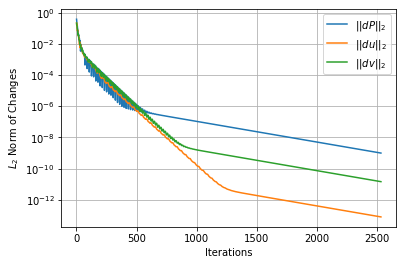

In [266]:
convergence("log-4_mesh80")

In [430]:
Factor = 160 # mesh factor to import
file = "4_mesh"+str(Factor)
Lx = 1
Ly = 2.5
Ni = int(Lx*Factor)
Nj = int(Ly*Factor)
mesh=", "+str(Ni)+"*"+str(Nj)+" mesh"
dx = Lx/Ni
dy = Ly/Nj
x = np.arange(-dx/2, Lx+dx, dx)
y = np.arange(-dy/2, Ly+dy, dy)
X, Y = np.meshgrid(x, y)
u = read_field(file+"-u")
v = read_field(file+"-v")
u_mag = np.sqrt(u**2+v**2) # Velocity magnitude
vorticity = np.zeros(np.shape(u)) # Vorticity field
for i in range(1, int(Ni)+1):
    for j in range(1, int(Nj)+1):
        vorticity[j,i] = ((v[j,i+1]-v[j,i-1])/2/dx - (u[j+1,i]-u[j-1,i])/2/dy)
print(mesh)

, 160*400 mesh


xloc:		 0.568345051483043
yloc:		 2.123922196861174
vorticity:	 -2.401486276946871


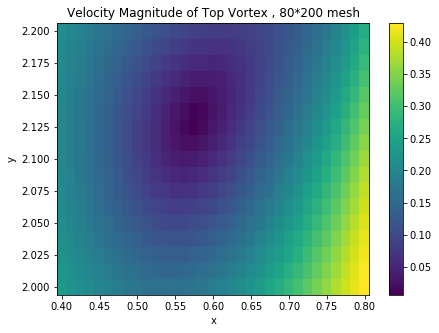

In [429]:
# Find vortex given searching domain
def find_vortex(xmin, xmax, ymin, ymax, position):
    imin = int(np.floor(xmin/dx+0.5))
    imax = int(np.ceil(xmax/dx+0.5)+1)
    jmin = int(np.floor(ymin/dy+0.5))
    jmax = int(np.ceil(ymax/dy+0.5)+1)

    usec = u_mag[jmin:jmax, imin:imax] # section of u_mag to be examined
    jj, ii = ind = np.unravel_index(usec.argmin(), usec.shape) ## indices of cell with min u_mag among usec
    jv, iv = jmin + jj, imin + ii # indices of vortex location cell

    # u change direction along y/j, interpolate u to fine y_vort
    y_points = [Y[jv-1, iv], Y[jv, iv], Y[jv+1, iv]]
    [a, b, c] = np.polyfit(y_points,u[jv-1:jv+2, iv], 2)
    y_vort = (-b + np.sqrt(b*b-4*a*c))/2/a
    r1, r2 = (-b + np.sqrt(b*b-4*a*c))/2/a, (-b - np.sqrt(b*b-4*a*c))/2/a
    y_vort = r1 if Y[jv+1, iv] >= r1 >= Y[jv-1, iv] else r2

    # v change direction along x/i, interpolate v to find x_vort
    x_points = [X[jv, iv-1], X[jv, iv], X[jv, iv+1]]
    [a, b, c] = np.polyfit(x_points,v[jv, iv-1:iv+2], 2)
    r1, r2 = (-b + np.sqrt(b*b-4*a*c))/2/a, (-b - np.sqrt(b*b-4*a*c))/2/a
    x_vort = r1 if X[jv, iv+1] >= r1 >= X[jv, iv-1] else r2
    print("xloc:\t\t", x_vort) # location of vortex
    print("yloc:\t\t", y_vort) # location of vortex

    coeffs = np.polyfit(y_points,vorticity[jv-1:jv+2, iv], 2)
    py = np.poly1d(coeffs) # vorticity interpolated by y
    coeffs = np.polyfit(x_points,vorticity[jv, iv-1:iv+2], 2)
    px = np.poly1d(coeffs) # vorticity interpolated by x
    print("vorticity:\t", (py(y_vort)+px(x_vort))/2) # vorticity (vortex strength)
    
    plt.figure(figsize=(7, 5))
    plt.pcolor(X[jmin:jmax, imin:imax], Y[jmin:jmax, imin:imax], u_mag[jmin:jmax, imin:imax])
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Velocity Magnitude of "+position+" Vortex "+mesh)
    plt.show()

find_vortex(xmin = 0.4, xmax = 0.8, ymin = 2, ymax = 2.2, position="Top")

xloc:		 0.4607602031212787
yloc:		 1.3274775625190902
vorticity:	 0.25486995755239994


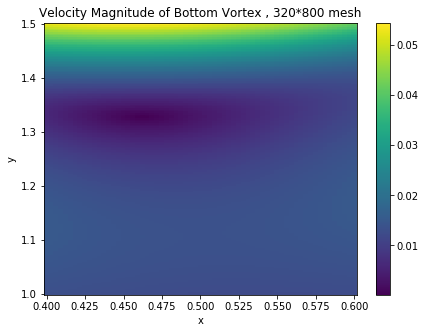

In [423]:
find_vortex(xmin = 0.4, xmax = 0.6, ymin = 1, ymax = 1.5, position="Bottom")

xloc:		 0.11557120893259319
yloc:		 0.12433667369498075
vorticity:	 -0.000378108617751386


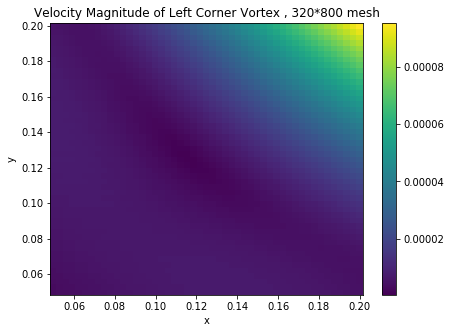

In [424]:
find_vortex(xmin = 0.05, xmax = 0.2, ymin = 0.05, ymax = 0.2, position="Left Corner")

xloc:		 0.8981052450177163
yloc:		 0.10744806153756259
vorticity:	 -0.00029925017387495505


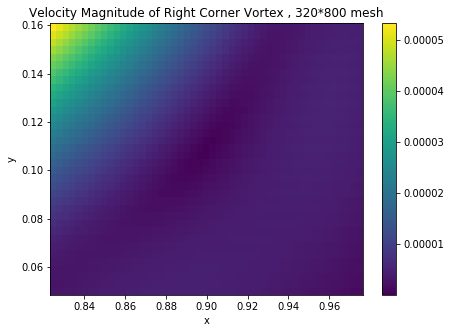

In [425]:
find_vortex(xmin = 0.825, xmax = 0.975, ymin = 0.05, ymax = 0.16, position="Right Corner")

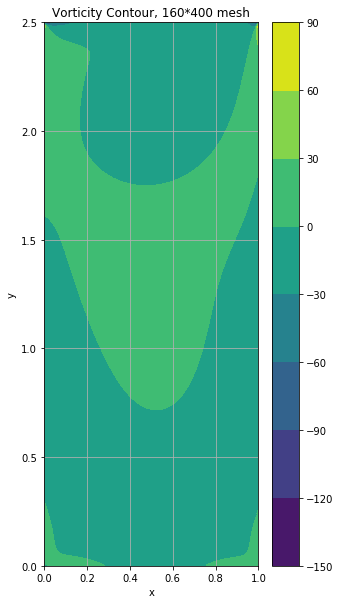

In [436]:
# Plot vorticity
plt.figure(figsize=(12*Lx/Ly, 10))
plt.contourf(X, Y,vorticity)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0, Lx, 0, Ly])
plt.title("Vorticity Contour"+mesh)
plt.grid(True)
plt.show()

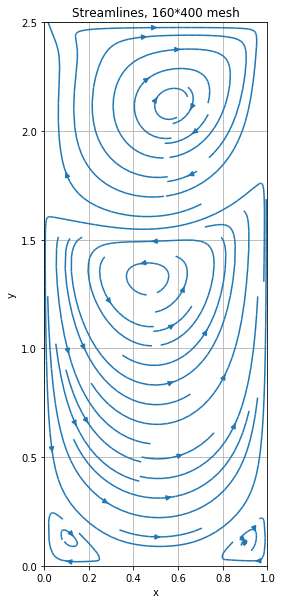

In [370]:
# Plot streamlines
plt.figure(figsize=(10*Lx/Ly, 10))
seed_points = np.array([np.linspace(0.4, 0.6,100), np.linspace(0.1, 2.3,100)])
seed_points = np.append(seed_points.T, [[0.1, 0.1],[0.02, 0.2], [0.9, 0.1], [0.95, 0.12], [0.99, 0.13]], axis=0)
plt.streamplot(X, Y, u, v, start_points=seed_points)#, )
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0, Lx, 0, Ly])
plt.title("Streamlines"+mesh)
plt.grid(True)
plt.show()

Top vortex in [0.4, 0.6] * [2, 2.2]
Bottom vortex in [0.4, 0.6]*[1.2, 1.5]
Left corner vortex (vortices?)
Right corner vortex (vortices?)

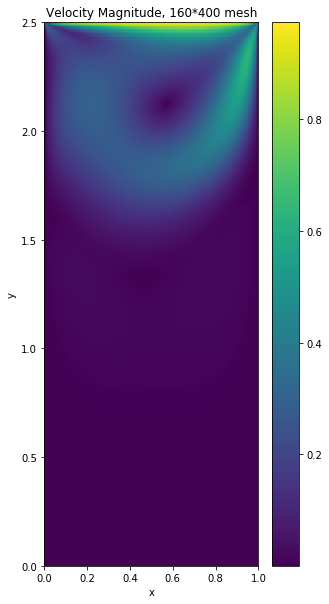

In [379]:
# Plot u_mag
plt.figure(figsize=(12*Lx/Ly, 10))
plt.pcolor(X, Y, u_mag)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0, Lx, 0, Ly])
plt.title("Velocity Magnitude"+mesh)
plt.show()